In [1]:
import matplotlib
matplotlib.use('TkAgg')
import numpy as np
import pandas as pd
import shmistogram as sh
from time import time
%matplotlib inline
# Simulate a mixture of Cauchy distributions
datas = {'o' + str(k): sh.simulations.cauchy_mixture(n=10**k)
         for k in range(1, 6)
}

In [2]:
def time_shmistogram(data):
    t0 = time()
    det = sh.Shmistogram(data)
    return time() - t0

times = [time_shmistogram(data) for k, data in datas.items()]


In [11]:
df = pd.DataFrame({'k': np.arange(1,6), 'seconds': np.log(times)})

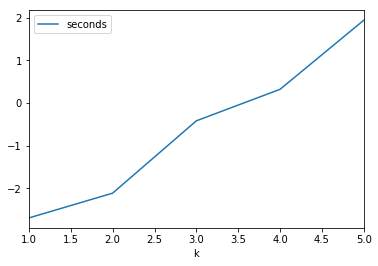

In [12]:
df.plot(x='k',y='seconds')